In [60]:
#Read/Load .csv file
df = pd.read_csv('Boston.csv')

In [61]:
def linear_regression(df):
    
#     Libraries
    import numpy as np
    import pandas as pd 
    import matplotlib
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
# ---- correlation matrix of the columns (with a statistical significance of 0.1%) and a scatter plot of medv(lstat)

    ## Import pearsonr function from scipy -- calculate the correlation and p-value between two columns
    from scipy.stats import pearsonr

    ## Calculate the correlations between the columns
    df_corrs = df.corr(method='pearson')

    ## Calculate the p-value, as the second element of the response from the pearsonr function. 
    pval = df.corr(method=lambda x, y: pearsonr(x, y)[1])

    ## Establish the mask, to hide values without a given statistical significance
    ptg_stat_sig = 0.1/100
    mask = pval > ptg_stat_sig

    ## Plot the correlation matrix using seaborn's heatmap function
    print("The result heatmap is:")
    plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(df_corrs, mask = mask, square = True, cmap = 'coolwarm', annot = True)

#     # -------------------------
#     target_corr = abs(cor)
#     positive_corr_target = target_corr[> (0.5)]
#     positive_corr_target

# ----
    plt.rcParams['figure.figsize'] = [15, 6]
    #plt.subplots(figsize=(15, 6))
    #plt.scatter(df['lstat'], df['medv'])
    plt.plot(df['lstat'], df['medv'], '.r')
    plt.show()
# ------ Fit a linear model considering medv and lstat, with medv being the response and lstat the predictor. 
# Use the whole dataset -- do not divide in train and test datasets. Calculate the coefficients and the  R2 
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    ## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
    ## array in a matricial shape, even if with a single column
    X = df['lstat'].values.reshape(-1, 1)
    y = df['medv'].values.reshape(-1, 1)

    ## Initialize the model as a LinearRegression() function, and fit the data to it
    regr = LinearRegression()
    regr.fit(X, y)

    ## Print the interception and coefficient
    print('The equation of the Straight Line is medv = {:.4f} + {:.4f} * lstat'.format(regr.intercept_[0], regr.coef_[0][0]))

    ## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
    medv_pred = regr.predict(X)
    r2_value = r2_score(y, medv_pred)
    print("The result of linear model considering medv and lstat, with medv being the response and lstat the predictor:")
    print('is R^2: {:.4f}'.format(r2_value))
    
# ------Plot the fitted linear regression in the scatter plot

    ## Determine limits (min/max) of lstat and calculate the corresponding value of medv. Important: this can be done between
    ## only two points because this is a linear regression.
    limits_lstat = np.array([min(X), max(X)])
    medv_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_lstat

    ## Plot the scatterplot and the regression line
    plt.rcParams['figure.figsize'] = [15, 6]
    plt.plot(df['lstat'], df['medv'], '.r')
    plt.plot(limits_lstat, medv_vals, 'b-')
    print("The fitted linear regression in the scatter plot is:")
    plt.show()
    
# -----Plot the residuals against the fitted values

    ## Calculate the residuals as the difference between the actual response and the predicted response
    residuals_y = y - medv_pred
    residuals_x = medv_pred

    plt.rcParams['figure.figsize'] = [15, 6]
    plt.plot(residuals_x, residuals_y, '.b')
    plt.grid(visible=True)
    print("The residual against the fitted values is:")
    plt.show()

# ----Fit a linear model with medv as the response and lstat and age as the predictors. Calculate the coefficients and the  R2

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    ## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
    ## array in a matricial shape, even if with a single column
    cols = ['lstat', 'age']
    X = df[cols].values
    y = df['medv'].values.reshape(-1, 1)

    ## Initialize the model as a LinearRegression() function, and fit the data to it
    regr = LinearRegression()
    regr.fit(X, y)

    ## Print the interception and coefficient
    print("The fitted linear regression with medv as the response and lstat and age as the predictors is:")
    print('medv = {:.4f} + {:.4f} * lstat + {:.4f} * age'.format(regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1]))

    ## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
    medv_pred = regr.predict(X)
    r2_value = r2_score(y, medv_pred)
    print('R^2: {:.4f}'.format(r2_value))

# ----Fit a linear model with medv as the response and all the other columns as the predictors. Calculate the coefficients and the  R2
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    ## Assign the predictor and response to variables. To fit the data, the pandas dataframe must be converted into a numpy
    ## array in a matricial shape, even if with a single column
    X_df = df.drop(columns = 'medv')
    X = X_df.values
    y = df['medv'].values.reshape(-1, 1)

    ## Initialize the model as a LinearRegression() function, and fit the data to it
    regr = LinearRegression()
    regr.fit(X, y)

    ## Format and print the interception and coefficients
    values = list(regr.coef_[0])
    values.insert(0, regr.intercept_[0])
    names = list(X_df.columns.values)
    names.insert(0,'intrcpt')
    s = ['{} :: {:.4f}'.format(names[i].rjust(7), values[i]) for i in range(len(values))]
    listToStr = '\n'.join([str(elem) for elem in s]) 
    print(listToStr)  

    ## To calculate the R^2 score, the prediction of medv is calculate using the predict method.
    medv_pred = regr.predict(X)
    r2_value = r2_score(y, medv_pred)
    print("The fitted linear regression with medv as the response and **all** the other columns as the predictors is:")
    print('\n{} :: {:.4f}'.format('R^2'.rjust(7), r2_value))
    
# ----Fit a linear model with medv as the response and lstat and age as the predictors. Consider interactions terms. Calculate the coefficients and the  R2 
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    # Prepare the inputs and outputs
    cols = ['lstat', 'age']
    X = df[cols].values
    y = df['medv'].values.reshape(-1, 1)

    # Use PolynomialFeatures with interaction_only to transform the input matrix
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    X = poly.fit_transform(X)

    # Fit the data to the linear model
    regr = LinearRegression()
    regr.fit(X, y)

    # Print the results
    print('medv = {:.4f} + {:.4f} * lstat + {:.4f} * age + {:.4f} * lstat * age'.format(
        regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1], regr.coef_[0][2]
    ))

    # Calculate the R^2 score between the actual output and the predicted one
    medv_pred = regr.predict(X)
    r2_value = r2_score(y, medv_pred)
    print("The fitted linear regression with medv as the response and lstat and age as the predictors is:")
    print('R^2: {:.4f}'.format(r2_value))
    
#----Make a scatter plot with the xx axis being lstat, the yy being age and medv scaled as the color of the points.
    print("The scatter plot with the xx axis being Istat, the yy being age and medv scaled as the color of the points:")
    plt.subplots(figsize=(15, 6))
    sns.scatterplot(data=df, x="lstat", y="age", hue="medv", palette='RdBu')
    
# ----Fit a linear model with medv as the response and lstat as the predictor. Consider terms of second degree. Calculate the coefficients and the  R2
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    # Prepare input and output datasets
    X = df['lstat'].values.reshape(-1, 1)
    y = df['medv'].values.reshape(-1, 1)

    # Apply the polynomial transformation to the input dataset -- consider 2nd degree and without interaction
    poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
    X = poly.fit_transform(X)

    # Fit the linear model
    regr = LinearRegression()
    regr.fit(X, y)

    # Print the fitted model coefficients
    print('medv = {:.4f} + {:.4f} * lstat + {:.4f} * lstat^2'.format(
        regr.intercept_[0], regr.coef_[0][0], regr.coef_[0][1]
    ))

    # Calculate and print the R^2 score
    medv_pred = regr.predict(X)
    r2_value = r2_score(y, medv_pred)
    print("The fitted linear model with medv as the response and lstat as the predictor (Considered terms of second degree):")
    print('R^2: {:.4f}'.format(r2_value))
    
#----Plot the fitted model from exercise 11. against the scatter plot of lstat vs medv.    
    ## Determine limits (min/max) of lstat
    limits_lstat = np.linspace(start = min(df['lstat']), stop = max(df['lstat']), num = 10**3)
    medv_vals = regr.intercept_[0] + regr.coef_[0][0]*limits_lstat + regr.coef_[0][1]*limits_lstat**2
    print("The fitted model in the scatter plot is:")
    plt.rcParams['figure.figsize'] = [15, 6]
    plt.plot(df['lstat'], df['medv'], '.r')
    plt.plot(limits_lstat, medv_vals, 'b-')
    plt.show()
    
# em falta do 13 em diante
    
    return df

The result heatmap is:


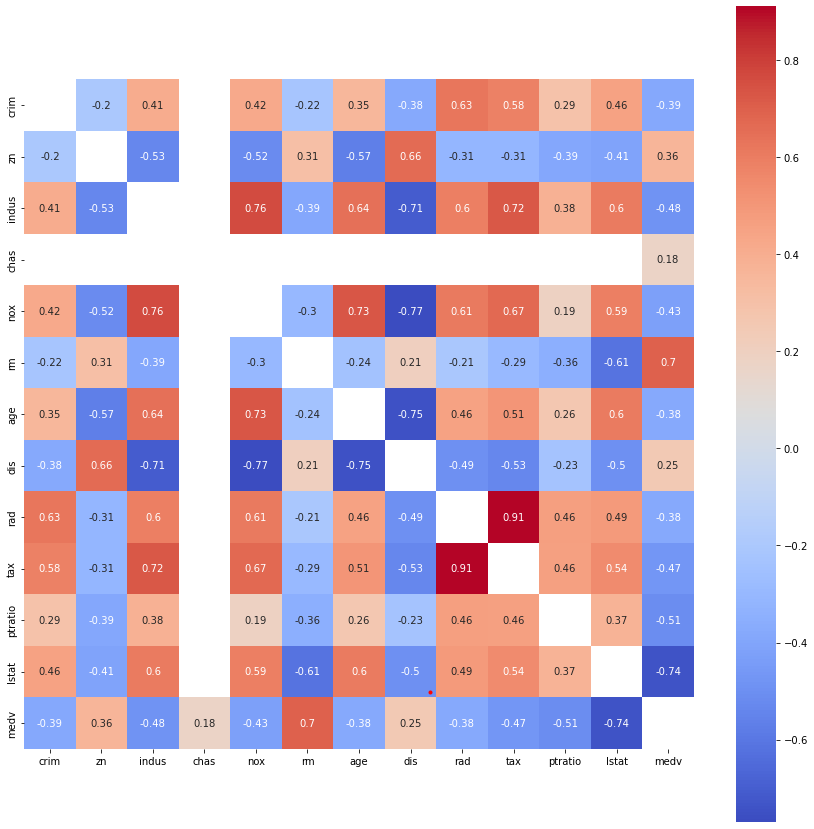

The equation of the Straight Line is medv = 34.5538 + -0.9500 * lstat
The result of linear model considering medv and lstat, with medv being the response and lstat the predictor:
is R^2: 0.5441
The fitted linear regression in the scatter plot is:


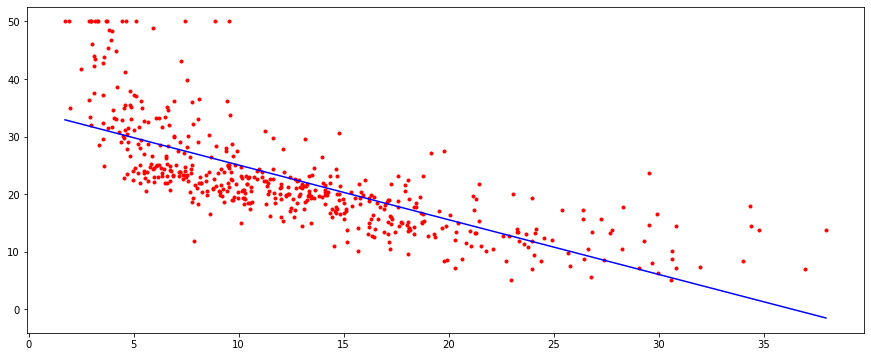

The residual against the fitted values is:


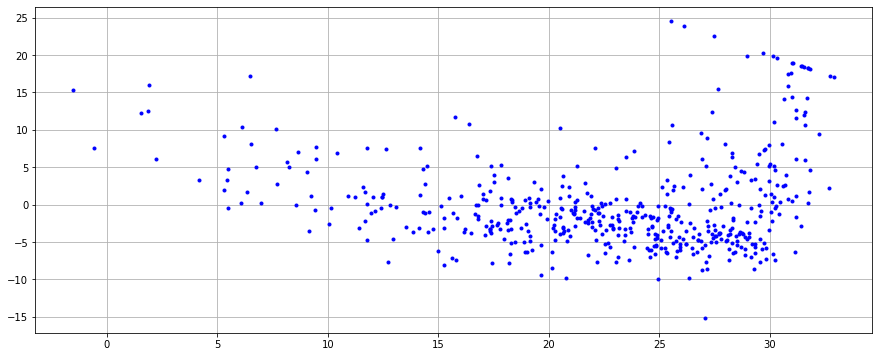

The fitted linear regression with medv as the response and lstat and age as the predictors is:
medv = 33.2228 + -1.0321 * lstat + 0.0345 * age
R^2: 0.5513
intrcpt :: 41.6173
   crim :: -0.1214
     zn :: 0.0470
  indus :: 0.0135
   chas :: 2.8400
    nox :: -18.7580
     rm :: 3.6581
    age :: 0.0036
    dis :: -1.4908
    rad :: 0.2894
    tax :: -0.0127
ptratio :: -0.9375
  lstat :: -0.5520
The fitted linear regression with medv as the response and **all** the other columns as the predictors is:

    R^2 :: 0.7343
medv = 36.0885 + -1.3921 * lstat + -0.0007 * age + 0.0042 * lstat * age
The fitted linear regression with medv as the response and lstat and age as the predictors is:
R^2: 0.5557
The scatter plot with the xx axis being Istat, the yy being age and medv scaled as the color of the points:
medv = 42.8620 + -2.3328 * lstat + 0.0435 * lstat^2
The fitted linear model with medv as the response and lstat as the predictor (Considered terms of second degree):
R^2: 0.6407
The fitted m

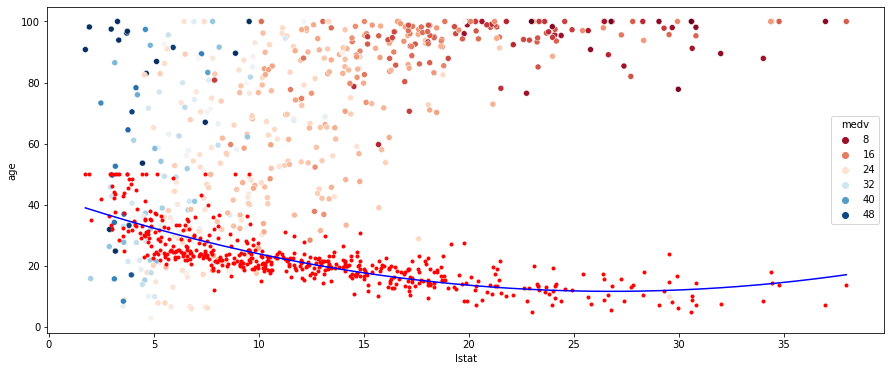

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [62]:
linear_regression(df)